## **Car Damage Detection, Masking and Area Percentage Calculation**


---


The following code adapts from the [Mask_RCNN](https://arxiv.org/abs/1703.06870) implementation from the Facebook AI Research Team (FAIR).

*    Main source repository: https://github.com/matterport/Mask_RCNN
*    Our implementation: https://github.com/rajat-roy/car_damage




### **1. Import all the dependencies**

In [1]:
import cv2
import random
import matplotlib.pyplot as plt

import tensorflow as tf
# Disable Tensorflow warnings
tf.logging.set_verbosity(tf.logging.ERROR)

# import inference code
from car_damage import Inference

# Enable plotting in notebook
%matplotlib inline

/home/ubuntu/miniconda3/envs/tf14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/miniconda3/envs/tf14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/miniconda3/envs/tf14/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ubuntu/miniconda3/envs/tf14/lib/python3.6/s

### **2. Do some Inference and calculation**
*   Change image_path to test another image, like `image_path = "dataset/XXXX.JPEG"`.
*    (Optional) Upload images directly from local drive via upload option in files tab and set `image_path = "?.jpg"`.



Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

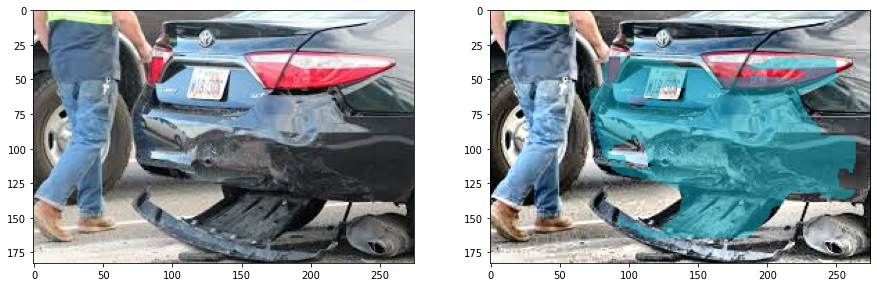

In [2]:
# Set up file paths
random_file = random.randint(300, 900)
image_path = "dataset/{0:04}.JPEG".format(random_file) # Input Image path
# image_path = "6.jpg"
weights_path = "mask_rcnn_car_damage_0030.h5" # pre-trained model weights path

# Inference on new image
result = Inference(weights_path, image_path)

# show the results
img = cv2.imread(image_path) # raw input image
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

fig = plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()